<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/Choose_best_Activation_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

New shape: (70000, 49)
Testing 3 activation functions...

Act        Test Acc   Epochs
--------------------------------
relu       0.9093     96
logistic   0.9210     181
tanh       0.9127     61


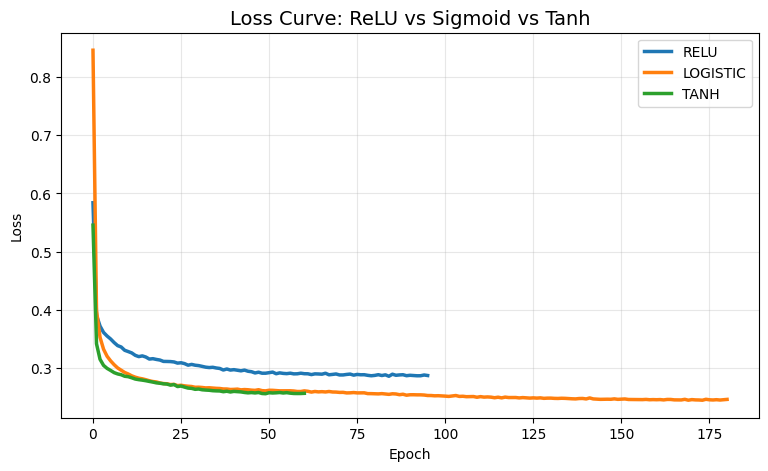

In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)

images = X.reshape(-1, 28, 28)

def extract_4x4_features(img):

    feats = []
    for i in range(0, 28, 4):
        for j in range(0, 28, 4):
            patch = img[i:i+4, j:j+4]
            feats.append(patch.mean())
    return np.array(feats)

X_features = np.array([extract_4x4_features(img) for img in images])
print("New shape:", X_features.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42, stratify=y)

activations = ['relu', 'logistic', 'tanh']
results = []

print("Testing 3 activation functions...\n")
print(f"{'Act':<10} {'Test Acc':<10} {'Epochs'}")
print("-" * 32)

for act in activations:
    mlp = MLPClassifier(
        hidden_layer_sizes=(10,),
        activation=act,
        learning_rate='constant',
        learning_rate_init=0.01,
        batch_size=64,
        max_iter=200,
        random_state=42
    )
    mlp.fit(X_train, y_train)
    acc = mlp.score(X_test, y_test)
    results.append((act, acc, mlp.n_iter_, mlp.loss_curve_))
    print(f"{act:<10} {acc:.4f}     {mlp.n_iter_}")

# === GRAPH ===
plt.figure(figsize=(9,5))
for name, _, _, curve in results:
    plt.plot(curve, label=name.upper(), linewidth=2.5)
plt.title('Loss Curve: ReLU vs Sigmoid vs Tanh', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()